# Web Scraping Project

 ### Problem Statement


 - Data Analysis on IMDB Top Rated Movies


### import required libraries

In [1]:
import numpy as np
import pandas as pd
import re
from bs4 import BeautifulSoup
import requests
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity='all'

In [2]:
url='https://www.imdb.com/list/ls046196709/?sort=list_order,asc&st_dt=&mode=detail&page=1'
page=requests.get(url)

In [3]:
page.status_code

200

In [4]:
content=page.text

In [5]:
soup=BeautifulSoup(content)

In [6]:
soup

<!DOCTYPE html>
<html xmlns:fb="http://www.facebook.com/2008/fbml" xmlns:og="http://ogp.me/ns#">
<head>
<meta charset="utf-8"/>
<script type="text/javascript">var IMDbTimer={starttime: new Date().getTime(),pt:'java'};</script>
<script>
    if (typeof uet == 'function') {
      uet("bb", "LoadTitle", {wb: 1});
    }
</script>
<script>(function(t){ (t.events = t.events || {})["csm_head_pre_title"] = new Date().getTime(); })(IMDbTimer);</script>
<title>IMDB Top 500+ - IMDb</title>
<script>(function(t){ (t.events = t.events || {})["csm_head_post_title"] = new Date().getTime(); })(IMDbTimer);</script>
<script>
    if (typeof uet == 'function') {
      uet("be", "LoadTitle", {wb: 1});
    }
</script>
<script>
    if (typeof uex == 'function') {
      uex("ld", "LoadTitle", {wb: 1});
    }
</script>
<link href="https://www.imdb.com/list/ls046196709/" rel="canonical"/>
<meta content="http://www.imdb.com/list/ls046196709/" property="og:url"/>
<script>
    if (typeof uet == 'function') {
      u

In [7]:
type(page)

requests.models.Response

In [8]:
type(soup)

bs4.BeautifulSoup

# 1.Data Scraping Process

In [9]:
# find the first PageElement that matches the given criteria

soup.find('div',class_='lister-item-content')

<div class="lister-item-content">
<h3 class="lister-item-header">
<span class="lister-item-index unbold text-primary">1.</span>
<a href="/title/tt0111161/">The Shawshank Redemption</a>
<span class="lister-item-year text-muted unbold">(1994)</span>
</h3>
<p class="text-muted text-small">
<span class="certificate">A</span>
<span class="ghost">|</span>
<span class="runtime">142 min</span>
<span class="ghost">|</span>
<span class="genre">
Drama            </span>
</p>
<div class="ipl-rating-widget">
<div class="ipl-rating-star small">
<span class="ipl-rating-star__star">
<svg class="ipl-icon ipl-star-icon" fill="#000000" height="24" viewbox="0 0 24 24" width="24" xmlns="http://www.w3.org/2000/svg">
<path d="M0 0h24v24H0z" fill="none"></path>
<path d="M12 17.27L18.18 21l-1.64-7.03L22 9.24l-7.19-.61L12 2 9.19 8.63 2 9.24l5.46 4.73L5.82 21z"></path>
<path d="M0 0h24v24H0z" fill="none"></path>
</svg>
</span>
<span class="ipl-rating-star__rating">9.3</span>
</div>
<div class="ipl-rating-interac

In [10]:
# store the first movie details
x=soup.find('div',class_='lister-item-content')

In [11]:
x.text

'\n\n1.\nThe Shawshank Redemption\n(1994)\n\n\nA\n|\n142 min\n|\n\nDrama            \n\n\n\n\n\n\n\n\n\n\n9.3\n\n\n\n\n\n\n\n\n\n\n\n\n0\n\n\n\n\n\n\n\n\nRate\n\n\n\n\n\n \n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n1\n\n\n\n\n\n\n\n\nRate\n\n\n\n\n\n\n\n\n\n\n\n2\n\n\n\n\n\n\n\n\nRate\n\n\n\n\n\n\n\n\n\n\n\n3\n\n\n\n\n\n\n\n\nRate\n\n\n\n\n\n\n\n\n\n\n\n4\n\n\n\n\n\n\n\n\nRate\n\n\n\n\n\n\n\n\n\n\n\n5\n\n\n\n\n\n\n\n\nRate\n\n\n\n\n\n\n\n\n\n\n\n6\n\n\n\n\n\n\n\n\nRate\n\n\n\n\n\n\n\n\n\n\n\n7\n\n\n\n\n\n\n\n\nRate\n\n\n\n\n\n\n\n\n\n\n\n8\n\n\n\n\n\n\n\n\nRate\n\n\n\n\n\n\n\n\n\n\n\n9\n\n\n\n\n\n\n\n\nRate\n\n\n\n\n\n\n\n\n\n\n\n10\n\n\n\n\n\n\n\n\nRate\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n0\n\n\nError: please try again.\n\n\n\n\n\n\n\n\n82        \n        Metascore\n        \n\nOver the course of several years, two convicts form a friendship, seeking consolation and, eventually, redemption through basic compassion.\n\n    Director:\nFrank Darabont\n| \n    Stars:\nTim Robbins, \nMorgan Freeman, \nBob

In [12]:
title=[]
year=[]
certificate=[]
time=[]
genre=[]
ratings=[]
metascore=[]
votes=[]
gross=[]
pg_no=[]

for x in range(1,6):
    url='https://www.imdb.com/list/ls046196709/?sort=list_order,asc&st_dt=&mode=detail&page={}'.format(x)
    pagecontent=requests.get(url).text
    soup=BeautifulSoup(pagecontent)
    
    
    for i in soup.find_all('div',class_='lister-item mode-detail'):
        movie_name=i.h3.a.text
        title.append(movie_name)

        released_year=i.h3.find('span',class_='lister-item-year text-muted unbold').text.replace('(','').replace(')','')
        year.append(released_year)

        cert_ficate=i.p.span.text
        certificate.append(cert_ficate)

        runtime= i.p.find('span',class_='runtime').text
        time.append(runtime)

        type_=i.p.find('span',class_='genre').text.replace('\n','').replace(' ','')
        genre.append(type_)

        rate=i.find('span',class_='ipl-rating-star__rating').text
        ratings.append(rate)

        meta=i.find('span',class_='metascore').text.replace(' ','') if i.find('span',class_='metascore') else 'NaN'
        metascore.append(meta)

        value=i.find_all('span',attrs={'name':'nv'})
        vote=value[0].text
        votes.append(vote)

        gross_count=value[1].text if len(value)>1 else 'NaN'
        gross.append(gross_count)
        

        
        pg_no.append(x)
    print('page number{}'.format(x))

page number1
page number2
page number3
page number4
page number5


In [13]:
movie_df=pd.DataFrame({'Title':title,
                      'Released_Year':year,
                      'Certificate':certificate,
                      'Movie_Duration':time,
                      'Genre':genre,
                      'Ratings':ratings,
                      'Metascore':metascore,
                      'Votes':votes,
                      'Gross':gross,
                      'Page_No.':pg_no})

In [14]:
movie_df

,Title,Released_Year,Certificate,Movie_Duration,Genre,Ratings,Metascore,Votes,Gross,Page_No.
0,The Shawshank Redemption,1994,A,142 min,Drama,9.3,82,"2,748,225",$28.34M,1
1,The Godfather,1972,A,175 min,"Crime,Drama",9.2,100,"1,911,455",$134.97M,1
2,The Dark Knight,2008,UA,152 min,"Action,Crime,Drama",9,84,"2,720,962",$534.86M,1
3,The Godfather Part II,1974,A,202 min,"Crime,Drama",9,90,"1,302,025",$57.30M,1
4,The Lord of the Rings: The Return of the King,2003,U,201 min,"Action,Adventure,Drama",9,94,"1,888,645",$377.85M,1
...,...,...,...,...,...,...,...,...,...,...
482,Freaks,1932,64 min,64 min,"Drama,Horror",7.8,80,"48,322",$0.63M,5
483,Frankenstein,1931,A,70 min,"Drama,Horror,Sci-Fi",7.8,91,"75,699",NaN,5
484,Mou gaan dou,2002,UA,101 min,"Action,Crime,Drama",8,75,"127,709",$0.17M,5
485,The Manchurian Candidate,1962,A,126 min,"Drama,Thriller",7.9,94,"77,279",NaN,5


In [15]:
#save to csv

#movie_df.to_csv(r'C:\Users\SINDHU\OneDrive\Documents\Web_scraping_project\movie.csv')

# 2. Data Cleaning Process

In [16]:
# Reading the .csv File

data=pd.read_csv(r"C:\Users\SINDHU\OneDrive\Documents\Web_scraping_project\movie.csv") 

In [17]:
# Counting the individual certificate items 

for x,y in data["Certificate"].value_counts().items():
    print(x,y)

U 146
A 122
UA 80
R 28
PG-13 6
110 min 5
94 min 5
Not Rated 5
18 5
96 min 5
PG 5
105 min 3
125 min 3
107 min 3
100 min 3
87 min 3
112 min 2
170 min 2
16 2
7 2
95 min 2
108 min 2
130 min 2
102 min 2
113 min 2
117 min 2
138 min 2
75 min 2
128 min 2
G 2
91 min 1
141 min 1
84 min 1
120 min 1
114 min 1
104 min 1
97 min 1
101 min 1
123 min 1
88 min 1
82 min 1
92 min 1
69 min 1
118 min 1
12+ 1
76 min 1
126 min 1
13 1
15+ 1
153 min 1
68 min 1
196 min 1
205 min 1
67 min 1
129 min 1
45 min 1
115 min 1
158 min 1
85 min 1
121 min 1
139 min 1
64 min 1


In [18]:
# extract content

k=[]
for x,y in data["Certificate"].value_counts().items():
    if y<=5 and x!='PG'and x!='G':
        k.append(x)
(k)

['110 min',
 '94 min',
 'Not Rated',
 '18',
 '96 min',
 '105 min',
 '125 min',
 '107 min',
 '100 min',
 '87 min',
 '112 min',
 '170 min',
 '16',
 '7',
 '95 min',
 '108 min',
 '130 min',
 '102 min',
 '113 min',
 '117 min',
 '138 min',
 '75 min',
 '128 min',
 '91 min',
 '141 min',
 '84 min',
 '120 min',
 '114 min',
 '104 min',
 '97 min',
 '101 min',
 '123 min',
 '88 min',
 '82 min',
 '92 min',
 '69 min',
 '118 min',
 '12+',
 '76 min',
 '126 min',
 '13',
 '15+',
 '153 min',
 '68 min',
 '196 min',
 '205 min',
 '67 min',
 '129 min',
 '45 min',
 '115 min',
 '158 min',
 '85 min',
 '121 min',
 '139 min',
 '64 min']

In [19]:
# Replacing with Nan

z=data['Certificate'].replace(k,np.nan)
data['Certificate']=z
data['Certificate']


0        A
1        A
2       UA
3        A
4        U
      ... 
482    NaN
483      A
484     UA
485      A
486    NaN
Name: Certificate, Length: 487, dtype: object

In [20]:
## replacing null values to NR

data['Gross'].fillna('NR',inplace=True)
data

,Unnamed: 0,Title,Released_Year,Certificate,Movie_Duration,Genre,Ratings,Metascore,Votes,Gross,Page_No.
0,0,The Shawshank Redemption,1994,A,142 min,Drama,9.3,82.0,"2,744,447",$28.34M,1
1,1,The Godfather,1972,A,175 min,"Crime,Drama",9.2,100.0,"1,908,515",$134.97M,1
2,2,The Dark Knight,2008,UA,152 min,"Action,Crime,Drama",9.0,84.0,"2,717,138",$534.86M,1
3,3,The Godfather Part II,1974,A,202 min,"Crime,Drama",9.0,90.0,"1,300,438",$57.30M,1
4,4,The Lord of the Rings: The Return of the King,2003,U,201 min,"Action,Adventure,Drama",9.0,94.0,"1,886,411",$377.85M,1
...,...,...,...,...,...,...,...,...,...,...,...
482,482,Freaks,1932,NaN,64 min,"Drama,Horror",7.8,80.0,"48,279",$0.63M,5
483,483,Frankenstein,1931,A,70 min,"Drama,Horror,Sci-Fi",7.8,91.0,"75,630",NR,5
484,484,Mou gaan dou,2002,UA,101 min,"Action,Crime,Drama",8.0,75.0,"127,611",$0.17M,5
485,485,The Manchurian Candidate,1962,A,126 min,"Drama,Thriller",7.9,94.0,"77,242",NR,5


In [21]:
# replacing $ with space in Gross

y=data['Gross'].apply(lambda x:x.replace("$","")) 

In [22]:
data['Gross']=y

In [23]:
# replacing M with space in Gross
    
r=data['Gross'].apply(lambda x:x.replace("M","")) 

In [24]:
data['Gross']=r

In [25]:
data

,Unnamed: 0,Title,Released_Year,Certificate,Movie_Duration,Genre,Ratings,Metascore,Votes,Gross,Page_No.
0,0,The Shawshank Redemption,1994,A,142 min,Drama,9.3,82.0,"2,744,447",28.34,1
1,1,The Godfather,1972,A,175 min,"Crime,Drama",9.2,100.0,"1,908,515",134.97,1
2,2,The Dark Knight,2008,UA,152 min,"Action,Crime,Drama",9.0,84.0,"2,717,138",534.86,1
3,3,The Godfather Part II,1974,A,202 min,"Crime,Drama",9.0,90.0,"1,300,438",57.30,1
4,4,The Lord of the Rings: The Return of the King,2003,U,201 min,"Action,Adventure,Drama",9.0,94.0,"1,886,411",377.85,1
...,...,...,...,...,...,...,...,...,...,...,...
482,482,Freaks,1932,NaN,64 min,"Drama,Horror",7.8,80.0,"48,279",0.63,5
483,483,Frankenstein,1931,A,70 min,"Drama,Horror,Sci-Fi",7.8,91.0,"75,630",NR,5
484,484,Mou gaan dou,2002,UA,101 min,"Action,Crime,Drama",8.0,75.0,"127,611",0.17,5
485,485,The Manchurian Candidate,1962,A,126 min,"Drama,Thriller",7.9,94.0,"77,242",NR,5


In [26]:
## replacing commas with nothing in Votes

data['Votes'] = data['Votes'].astype(str)
a=data['Votes'].str.replace(',', '').astype(int)

In [27]:
data['Votes']=a

In [28]:
data

,Unnamed: 0,Title,Released_Year,Certificate,Movie_Duration,Genre,Ratings,Metascore,Votes,Gross,Page_No.
0,0,The Shawshank Redemption,1994,A,142 min,Drama,9.3,82.0,2744447,28.34,1
1,1,The Godfather,1972,A,175 min,"Crime,Drama",9.2,100.0,1908515,134.97,1
2,2,The Dark Knight,2008,UA,152 min,"Action,Crime,Drama",9.0,84.0,2717138,534.86,1
3,3,The Godfather Part II,1974,A,202 min,"Crime,Drama",9.0,90.0,1300438,57.30,1
4,4,The Lord of the Rings: The Return of the King,2003,U,201 min,"Action,Adventure,Drama",9.0,94.0,1886411,377.85,1
...,...,...,...,...,...,...,...,...,...,...,...
482,482,Freaks,1932,NaN,64 min,"Drama,Horror",7.8,80.0,48279,0.63,5
483,483,Frankenstein,1931,A,70 min,"Drama,Horror,Sci-Fi",7.8,91.0,75630,NR,5
484,484,Mou gaan dou,2002,UA,101 min,"Action,Crime,Drama",8.0,75.0,127611,0.17,5
485,485,The Manchurian Candidate,1962,A,126 min,"Drama,Thriller",7.9,94.0,77242,NR,5


In [29]:
## Adding extra columns

data[['Time','Duration']]=data['Movie_Duration'].str.split(' ',expand=True)

In [30]:
data.drop(['Movie_Duration','Duration','Unnamed: 0'],axis=1,inplace=True)

In [31]:
data

,Title,Released_Year,Certificate,Genre,Ratings,Metascore,Votes,Gross,Page_No.,Time
0,The Shawshank Redemption,1994,A,Drama,9.3,82.0,2744447,28.34,1,142
1,The Godfather,1972,A,"Crime,Drama",9.2,100.0,1908515,134.97,1,175
2,The Dark Knight,2008,UA,"Action,Crime,Drama",9.0,84.0,2717138,534.86,1,152
3,The Godfather Part II,1974,A,"Crime,Drama",9.0,90.0,1300438,57.30,1,202
4,The Lord of the Rings: The Return of the King,2003,U,"Action,Adventure,Drama",9.0,94.0,1886411,377.85,1,201
...,...,...,...,...,...,...,...,...,...,...
482,Freaks,1932,NaN,"Drama,Horror",7.8,80.0,48279,0.63,5,64
483,Frankenstein,1931,A,"Drama,Horror,Sci-Fi",7.8,91.0,75630,NR,5,70
484,Mou gaan dou,2002,UA,"Action,Crime,Drama",8.0,75.0,127611,0.17,5,101
485,The Manchurian Candidate,1962,A,"Drama,Thriller",7.9,94.0,77242,NR,5,126


In [32]:
data.columns

Index(['Title', 'Released_Year', 'Certificate', 'Genre', 'Ratings',
       'Metascore', 'Votes', 'Gross', 'Page_No.', 'Time'],
      dtype='object')

In [33]:
#creating sorted and final DataFrame 

final_df=data[['Title','Released_Year','Time','Certificate','Genre','Ratings','Metascore','Votes','Gross','Page_No.']]

In [34]:
final_df

,Title,Released_Year,Time,Certificate,Genre,Ratings,Metascore,Votes,Gross,Page_No.
0,The Shawshank Redemption,1994,142,A,Drama,9.3,82.0,2744447,28.34,1
1,The Godfather,1972,175,A,"Crime,Drama",9.2,100.0,1908515,134.97,1
2,The Dark Knight,2008,152,UA,"Action,Crime,Drama",9.0,84.0,2717138,534.86,1
3,The Godfather Part II,1974,202,A,"Crime,Drama",9.0,90.0,1300438,57.30,1
4,The Lord of the Rings: The Return of the King,2003,201,U,"Action,Adventure,Drama",9.0,94.0,1886411,377.85,1
...,...,...,...,...,...,...,...,...,...,...
482,Freaks,1932,64,NaN,"Drama,Horror",7.8,80.0,48279,0.63,5
483,Frankenstein,1931,70,A,"Drama,Horror,Sci-Fi",7.8,91.0,75630,NR,5
484,Mou gaan dou,2002,101,UA,"Action,Crime,Drama",8.0,75.0,127611,0.17,5
485,The Manchurian Candidate,1962,126,A,"Drama,Thriller",7.9,94.0,77242,NR,5


In [35]:
# Save the final df to a csv file & excel file

final_df.to_csv(r'C:\Users\SINDHU\OneDrive\Documents\Web_scraping_project\top_movies.csv')
final_df.to_excel(r'C:\Users\SINDHU\OneDrive\Documents\Web_scraping_project\top_moviess.xlsx')

### 1. Checking Duplicate Rows

In [36]:
# Checking Duplicate Values

final_df.duplicated().value_counts()

False    487
dtype: int64

In [37]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 487 entries, 0 to 486
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Title          487 non-null    object 
 1   Released_Year  487 non-null    object 
 2   Time           487 non-null    object 
 3   Certificate    389 non-null    object 
 4   Genre          487 non-null    object 
 5   Ratings        487 non-null    float64
 6   Metascore      442 non-null    float64
 7   Votes          487 non-null    int32  
 8   Gross          487 non-null    object 
 9   Page_No.       487 non-null    int64  
dtypes: float64(2), int32(1), int64(1), object(6)
memory usage: 36.3+ KB


In [38]:
final_df['Gross'].value_counts()

NR       72
4.36      5
0.17      4
0.01      4
0.06      4
         ..
23.38     1
32.87     1
4.14      1
83.01     1
0.63      1
Name: Gross, Length: 387, dtype: int64

In [39]:
final_df = final_df.replace('NR', np.nan)

In [40]:
final_df['Gross'].value_counts()

4.36     5
0.01     4
0.06     4
0.17     4
0.10     3
        ..
23.38    1
32.87    1
4.14     1
83.01    1
0.63     1
Name: Gross, Length: 386, dtype: int64

### 2. Handling Missing Values

In [41]:
# checking for null values

final_df.isna().sum() 

Title             0
Released_Year     0
Time              0
Certificate      98
Genre             0
Ratings           0
Metascore        45
Votes             0
Gross            72
Page_No.          0
dtype: int64

In [42]:
np.sum(final_df.isna().sum())

215

In [43]:
final_df.Released_Year.head(177)

0        1994
1        1972
2        2008
3        1974
4        2003
        ...  
172      2014
173      2016
174      2013
175      2014
176    I 2013
Name: Released_Year, Length: 177, dtype: object

In [44]:
# removing unwanted value from column

final_df['Released_Year']=final_df['Released_Year'].str.replace('I','').astype(int)

In [45]:
final_df.Released_Year.head(177)

0      1994
1      1972
2      2008
3      1974
4      2003
       ... 
172    2014
173    2016
174    2013
175    2014
176    2013
Name: Released_Year, Length: 177, dtype: int32

In [46]:
final_df

,Title,Released_Year,Time,Certificate,Genre,Ratings,Metascore,Votes,Gross,Page_No.
0,The Shawshank Redemption,1994,142,A,Drama,9.3,82.0,2744447,28.34,1
1,The Godfather,1972,175,A,"Crime,Drama",9.2,100.0,1908515,134.97,1
2,The Dark Knight,2008,152,UA,"Action,Crime,Drama",9.0,84.0,2717138,534.86,1
3,The Godfather Part II,1974,202,A,"Crime,Drama",9.0,90.0,1300438,57.30,1
4,The Lord of the Rings: The Return of the King,2003,201,U,"Action,Adventure,Drama",9.0,94.0,1886411,377.85,1
...,...,...,...,...,...,...,...,...,...,...
482,Freaks,1932,64,NaN,"Drama,Horror",7.8,80.0,48279,0.63,5
483,Frankenstein,1931,70,A,"Drama,Horror,Sci-Fi",7.8,91.0,75630,NaN,5
484,Mou gaan dou,2002,101,UA,"Action,Crime,Drama",8.0,75.0,127611,0.17,5
485,The Manchurian Candidate,1962,126,A,"Drama,Thriller",7.9,94.0,77242,NaN,5


### Get the Missing values for each column

In [47]:
final_df.isna().sum()

Title             0
Released_Year     0
Time              0
Certificate      98
Genre             0
Ratings           0
Metascore        45
Votes             0
Gross            72
Page_No.          0
dtype: int64

### Replace Missing Values with mean or median

In [48]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 487 entries, 0 to 486
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Title          487 non-null    object 
 1   Released_Year  487 non-null    int32  
 2   Time           487 non-null    object 
 3   Certificate    389 non-null    object 
 4   Genre          487 non-null    object 
 5   Ratings        487 non-null    float64
 6   Metascore      442 non-null    float64
 7   Votes          487 non-null    int32  
 8   Gross          415 non-null    object 
 9   Page_No.       487 non-null    int64  
dtypes: float64(2), int32(2), int64(1), object(5)
memory usage: 34.4+ KB


### Numerical columns

In [49]:
final_df_numeric=final_df.select_dtypes(include=np.number)
final_df_numeric.head()

,Released_Year,Ratings,Metascore,Votes,Page_No.
0,1994,9.3,82.0,2744447,1
1,1972,9.2,100.0,1908515,1
2,2008,9.0,84.0,2717138,1
3,1974,9.0,90.0,1300438,1
4,2003,9.0,94.0,1886411,1


### categorical columns

In [50]:
final_df.select_dtypes(include=np.object) # to select object columns
final_df.head() 

,Title,Time,Certificate,Genre,Gross
0,The Shawshank Redemption,142,A,Drama,28.34
1,The Godfather,175,A,"Crime,Drama",134.97
2,The Dark Knight,152,UA,"Action,Crime,Drama",534.86
3,The Godfather Part II,202,A,"Crime,Drama",57.30
4,The Lord of the Rings: The Return of the King,201,U,"Action,Adventure,Drama",377.85
...,...,...,...,...,...
482,Freaks,64,NaN,"Drama,Horror",0.63
483,Frankenstein,70,A,"Drama,Horror,Sci-Fi",NaN
484,Mou gaan dou,101,UA,"Action,Crime,Drama",0.17
485,The Manchurian Candidate,126,A,"Drama,Thriller",NaN


,Title,Released_Year,Time,Certificate,Genre,Ratings,Metascore,Votes,Gross,Page_No.
0,The Shawshank Redemption,1994,142,A,Drama,9.3,82.0,2744447,28.34,1
1,The Godfather,1972,175,A,"Crime,Drama",9.2,100.0,1908515,134.97,1
2,The Dark Knight,2008,152,UA,"Action,Crime,Drama",9.0,84.0,2717138,534.86,1
3,The Godfather Part II,1974,202,A,"Crime,Drama",9.0,90.0,1300438,57.30,1
4,The Lord of the Rings: The Return of the King,2003,201,U,"Action,Adventure,Drama",9.0,94.0,1886411,377.85,1


In [51]:
## Replacing the Null VAlues With Mode

final_df['Certificate'].mode()

0    U
Name: Certificate, dtype: object

In [52]:
final_df.Certificate.fillna(final_df.Certificate.mode()[0],inplace=True)

In [53]:
final_df.isna().sum()

Title             0
Released_Year     0
Time              0
Certificate       0
Genre             0
Ratings           0
Metascore        45
Votes             0
Gross            72
Page_No.          0
dtype: int64

In [54]:
final_df.Gross=final_df.Gross.astype(float)

In [55]:
## REplacing the null Values with Mode

final_df['Gross'].mode()

0    4.36
Name: Gross, dtype: float64

In [56]:
final_df.Gross.fillna(final_df.Gross.mode()[0],inplace=True)

In [57]:
final_df.isna().sum()

Title             0
Released_Year     0
Time              0
Certificate       0
Genre             0
Ratings           0
Metascore        45
Votes             0
Gross             0
Page_No.          0
dtype: int64

In [58]:
final_df

,Title,Released_Year,Time,Certificate,Genre,Ratings,Metascore,Votes,Gross,Page_No.
0,The Shawshank Redemption,1994,142,A,Drama,9.3,82.0,2744447,28.34,1
1,The Godfather,1972,175,A,"Crime,Drama",9.2,100.0,1908515,134.97,1
2,The Dark Knight,2008,152,UA,"Action,Crime,Drama",9.0,84.0,2717138,534.86,1
3,The Godfather Part II,1974,202,A,"Crime,Drama",9.0,90.0,1300438,57.30,1
4,The Lord of the Rings: The Return of the King,2003,201,U,"Action,Adventure,Drama",9.0,94.0,1886411,377.85,1
...,...,...,...,...,...,...,...,...,...,...
482,Freaks,1932,64,U,"Drama,Horror",7.8,80.0,48279,0.63,5
483,Frankenstein,1931,70,A,"Drama,Horror,Sci-Fi",7.8,91.0,75630,4.36,5
484,Mou gaan dou,2002,101,UA,"Action,Crime,Drama",8.0,75.0,127611,0.17,5
485,The Manchurian Candidate,1962,126,A,"Drama,Thriller",7.9,94.0,77242,4.36,5


In [59]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 487 entries, 0 to 486
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Title          487 non-null    object 
 1   Released_Year  487 non-null    int32  
 2   Time           487 non-null    object 
 3   Certificate    487 non-null    object 
 4   Genre          487 non-null    object 
 5   Ratings        487 non-null    float64
 6   Metascore      442 non-null    float64
 7   Votes          487 non-null    int32  
 8   Gross          487 non-null    float64
 9   Page_No.       487 non-null    int64  
dtypes: float64(3), int32(2), int64(1), object(4)
memory usage: 34.4+ KB


In [60]:
final_df.Time=final_df.Time.astype(int)

In [61]:
final_df.sort_values(by='Votes',ascending=False,inplace=True)
final_df=final_df.reset_index()
final_df.head()

,index,Title,Released_Year,Time,Certificate,Genre,Ratings,Metascore,Votes,Gross,Page_No.
0,0,The Shawshank Redemption,1994,142,A,Drama,9.3,82.0,2744447,28.34,1
1,2,The Dark Knight,2008,152,UA,"Action,Crime,Drama",9.0,84.0,2717138,534.86,1
2,9,Inception,2010,148,UA,"Action,Adventure,Sci-Fi",8.8,74.0,2411968,292.58,1
3,10,Fight Club,1999,139,A,Drama,8.8,66.0,2185407,37.03,1
4,12,Forrest Gump,1994,142,UA,"Drama,Romance",8.8,82.0,2135259,330.25,1


In [62]:
final_df.drop('index',axis=1,inplace=True)

In [63]:
final_df

,Title,Released_Year,Time,Certificate,Genre,Ratings,Metascore,Votes,Gross,Page_No.
0,The Shawshank Redemption,1994,142,A,Drama,9.3,82.0,2744447,28.34,1
1,The Dark Knight,2008,152,UA,"Action,Crime,Drama",9.0,84.0,2717138,534.86,1
2,Inception,2010,148,UA,"Action,Adventure,Sci-Fi",8.8,74.0,2411968,292.58,1
3,Fight Club,1999,139,A,Drama,8.8,66.0,2185407,37.03,1
4,Forrest Gump,1994,142,UA,"Drama,Romance",8.8,82.0,2135259,330.25,1
...,...,...,...,...,...,...,...,...,...,...
482,Once Were Warriors,1994,102,A,"Crime,Drama",7.9,77.0,35475,2.20,5
483,Viskningar och rop,1972,91,A,Drama,8.0,NaN,35446,1.74,3
484,Nefes: Vatan Sagolsun,2009,128,U,"Action,Drama,Thriller",8.0,NaN,34381,4.36,2
485,A Night at the Opera,1935,96,U,"Comedy,Music,Musical",7.8,NaN,33686,2.54,4


In [64]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 487 entries, 0 to 486
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Title          487 non-null    object 
 1   Released_Year  487 non-null    int32  
 2   Time           487 non-null    int32  
 3   Certificate    487 non-null    object 
 4   Genre          487 non-null    object 
 5   Ratings        487 non-null    float64
 6   Metascore      442 non-null    float64
 7   Votes          487 non-null    int32  
 8   Gross          487 non-null    float64
 9   Page_No.       487 non-null    int64  
dtypes: float64(3), int32(3), int64(1), object(3)
memory usage: 32.5+ KB


In [65]:
final_df.describe()

,Released_Year,Time,Ratings,Metascore,Votes,Gross,Page_No.
count,487.000000,487.000000,487.000000,442.000000,4.870000e+02,487.000000,487.000000
mean,1984.648871,123.720739,8.101848,82.042986,4.386809e+05,63.097454,2.946612
std,25.127287,28.844768,0.257594,11.238114,4.684320e+05,101.690106,1.395622
min,1920.000000,45.000000,7.700000,33.000000,3.259100e+04,0.010000,1.000000
25%,1965.500000,103.000000,7.900000,75.000000,8.886650e+04,4.360000,2.000000
50%,1992.000000,119.000000,8.100000,84.000000,2.448030e+05,13.660000,3.000000
75%,2006.000000,138.000000,8.200000,91.000000,6.813915e+05,74.890000,4.000000
max,2018.000000,238.000000,9.300000,100.000000,2.744447e+06,678.820000,5.000000


In [66]:
final_df.to_excel(r'C:\Users\SINDHU\OneDrive\Documents\Web_scraping_project/cleaned_movie_data.xlsx')

# 3. Visualization

## Univariate

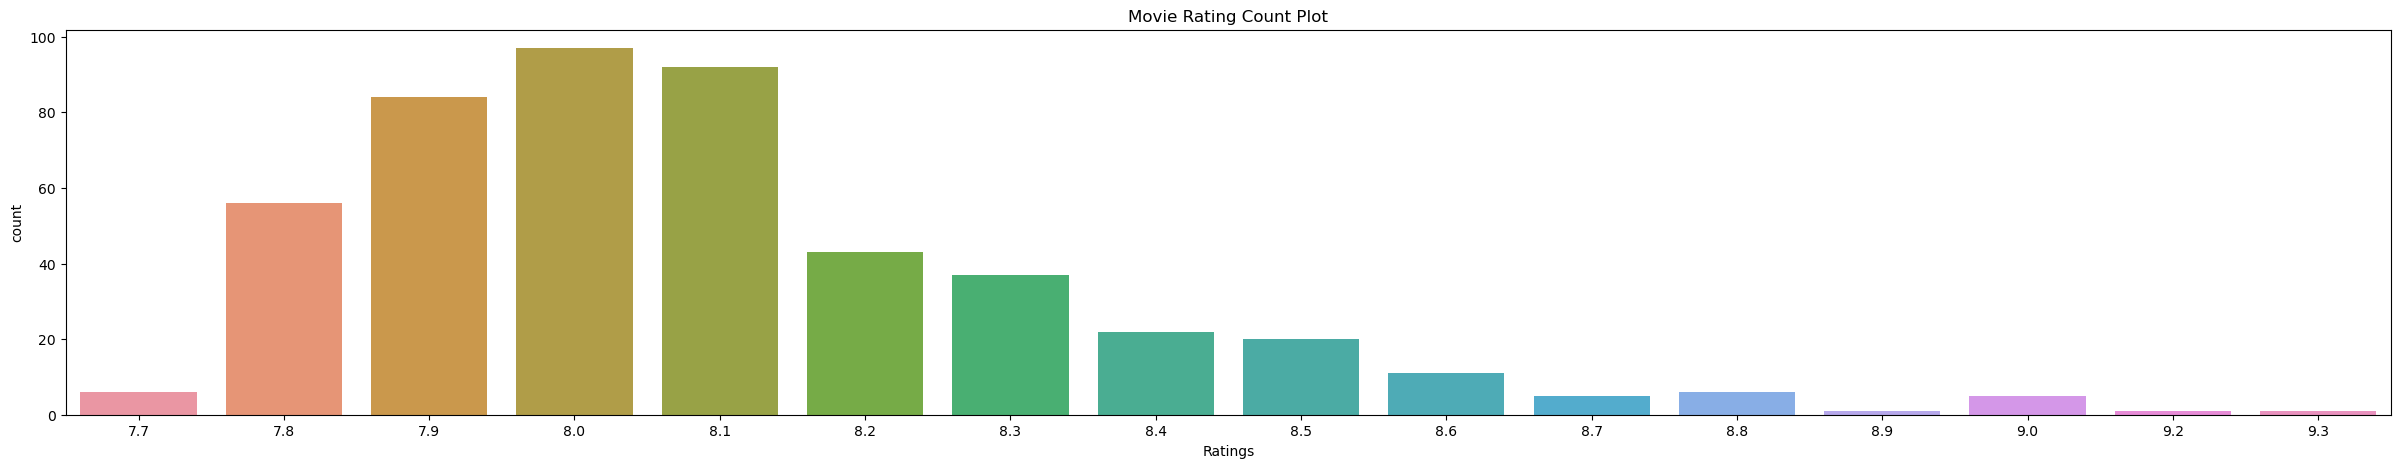

In [67]:
plt.figure(figsize=(30,5))
sns.countplot(data=final_df,x='Ratings')
plt.title('Movie Rating Count Plot');

### Pie chart

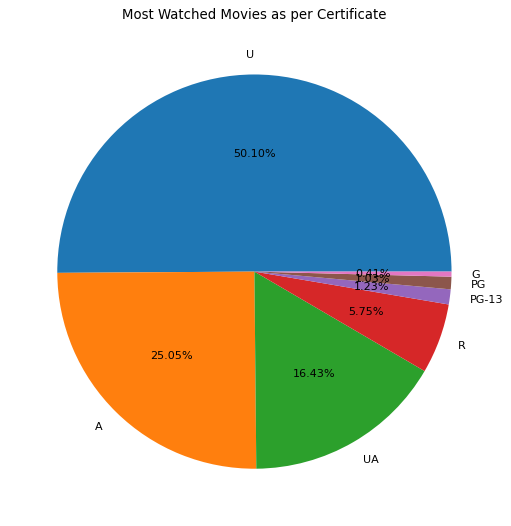

In [68]:
plt.figure(figsize=(20,8), dpi = 80)

plt.pie(final_df.Certificate.value_counts(),labels=final_df.Certificate.value_counts().index,autopct='%.2f%%' )
plt.title('Most Watched Movies as per Certificate');

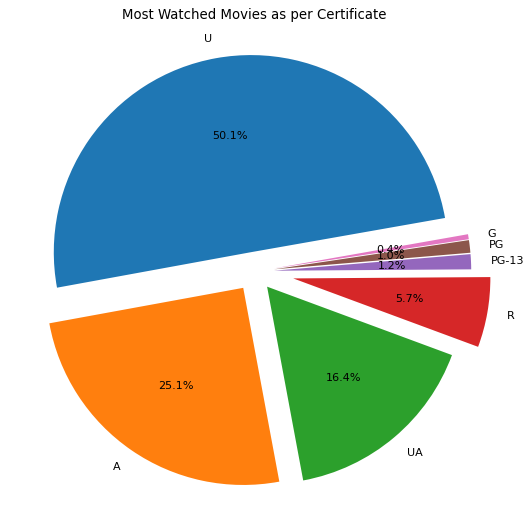

In [69]:
plt.figure(figsize=(20,8), dpi = 80)

plt.pie(final_df.Certificate.value_counts(),labels=final_df.Certificate.value_counts().index, startangle=10, autopct='%1.1f%%', explode=[0.1,0.1,0.1,0.2,0.1,0.1,0.1] )
plt.title('Most Watched Movies as per Certificate');


### Categorical and Numerical

### Bar plot

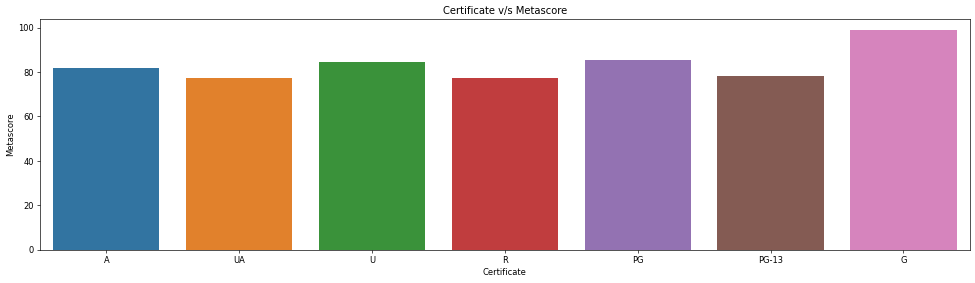

In [70]:
plt.figure(figsize=(20,5), dpi = 60)
sns.barplot(data=final_df,x='Certificate',y='Metascore',ci= None)
plt.title('Certificate v/s Metascore');

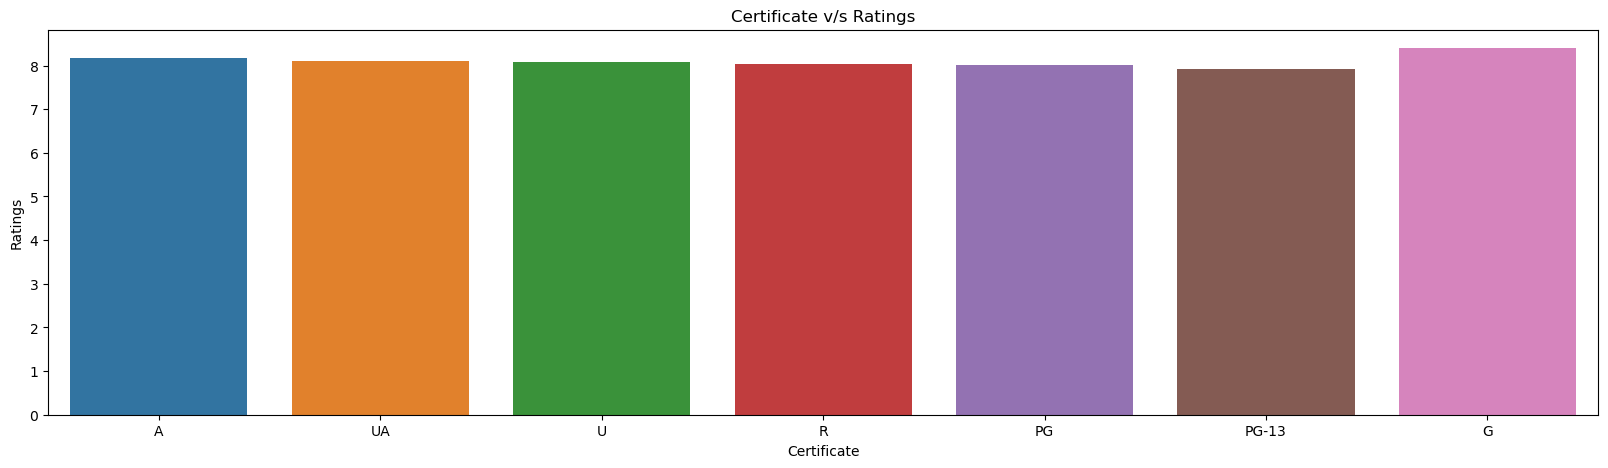

In [71]:
plt.figure(figsize=(20,5), dpi = 100)
sns.barplot(data=final_df,x='Certificate',y='Ratings',ci= None)
plt.title('Certificate v/s Ratings');

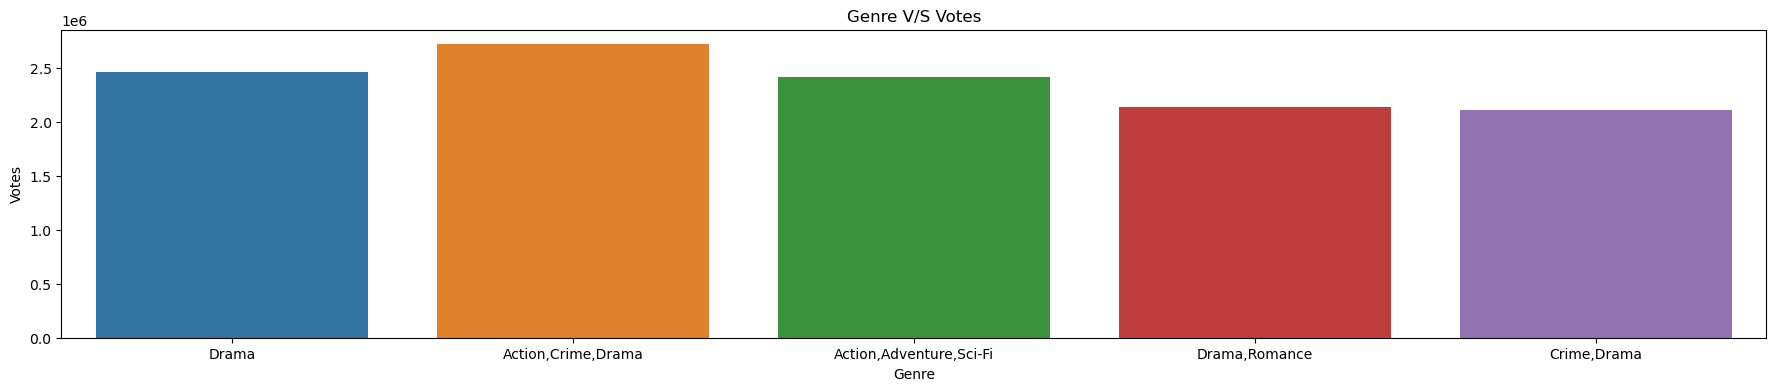

In [72]:
plt.figure(figsize=(22,4), dpi = 100)
sns.barplot(data=final_df,x=final_df.Genre[0:6],y='Votes',ci= None)
plt.title('Genre V/S Votes');

<Axes: xlabel='Ratings', ylabel='Density'>

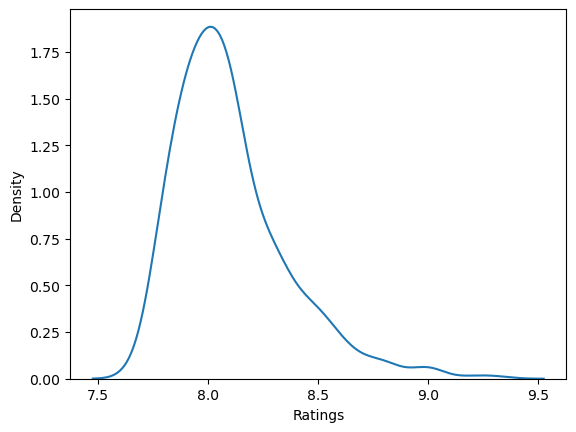

In [73]:
sns.kdeplot(final_df['Ratings'])
plt.show()

In [74]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 487 entries, 0 to 486
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Title          487 non-null    object 
 1   Released_Year  487 non-null    int32  
 2   Time           487 non-null    int32  
 3   Certificate    487 non-null    object 
 4   Genre          487 non-null    object 
 5   Ratings        487 non-null    float64
 6   Metascore      442 non-null    float64
 7   Votes          487 non-null    int32  
 8   Gross          487 non-null    float64
 9   Page_No.       487 non-null    int64  
dtypes: float64(3), int32(3), int64(1), object(3)
memory usage: 32.5+ KB


<Axes: >

Text(0.5, 1.0, 'box plot for Released_Year')

(array([0]), [Text(0, 0, '0')])

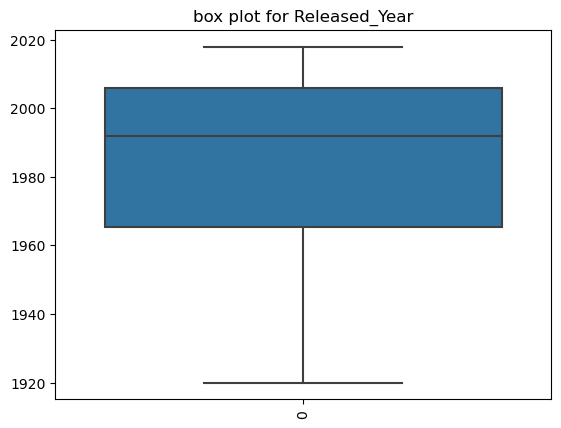

In [75]:
sns.boxplot(final_df['Released_Year'])
plt.title('box plot for Released_Year')
#plt.xlabel('City')
#plt.ylabel('Consultation_Fees')
plt.xticks(rotation=90)
plt.show()

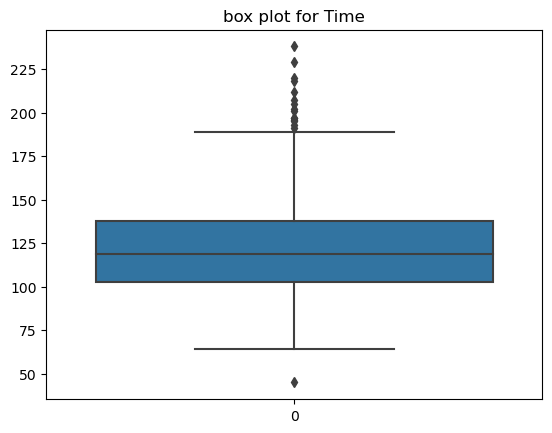

In [76]:
sns.boxplot(final_df['Time'])
plt.title('box plot for Time')
#plt.xlabel('City')
#plt.ylabel('Consultation_Fees')
plt.xticks(rotation=0);

In [77]:
time_h=final_df[(final_df['Time']>180)| (final_df['Time']<50)].index
final_df.drop(time_h,axis=0,inplace=True)

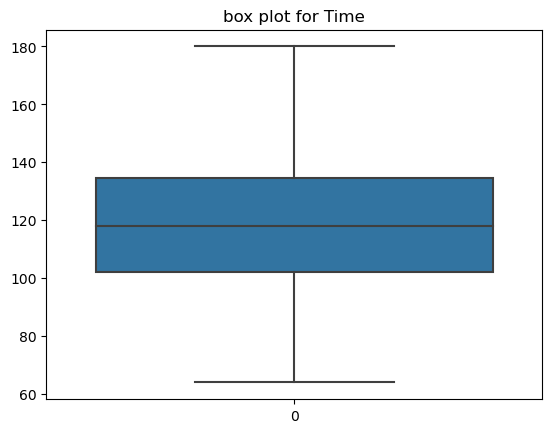

In [78]:
sns.boxplot(final_df['Time'])
plt.title('box plot for Time')
#plt.xlabel('City')
#plt.ylabel('Consultation_Fees')
plt.xticks(rotation=0);

## Bivariate analysis

### Numerical & Numerical
#### Heat Map

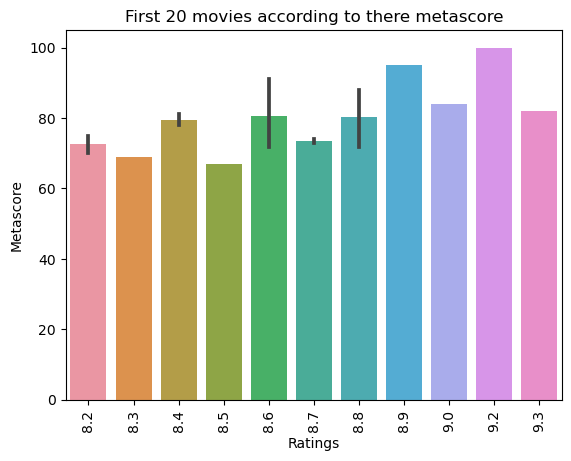

In [79]:
plt.xticks(rotation=90)
sns.barplot(data = final_df,x=final_df.Ratings[0:20],y=final_df.Metascore[0:20])
plt.title('First 20 movies according to there metascore');

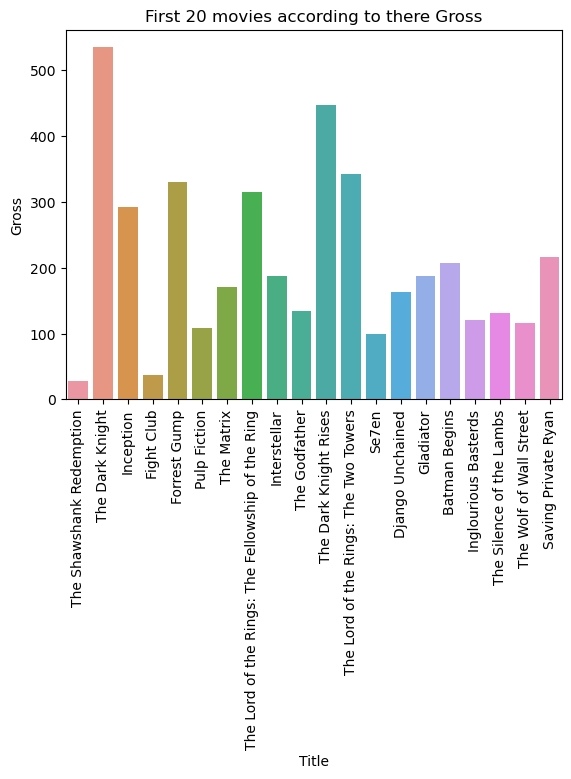

In [80]:
plt.xticks(rotation=90)
sns.barplot(data = final_df,x=final_df.Title[0:20],y=final_df.Gross[0:20])
plt.title('First 20 movies according to there Gross');

## Multivariate

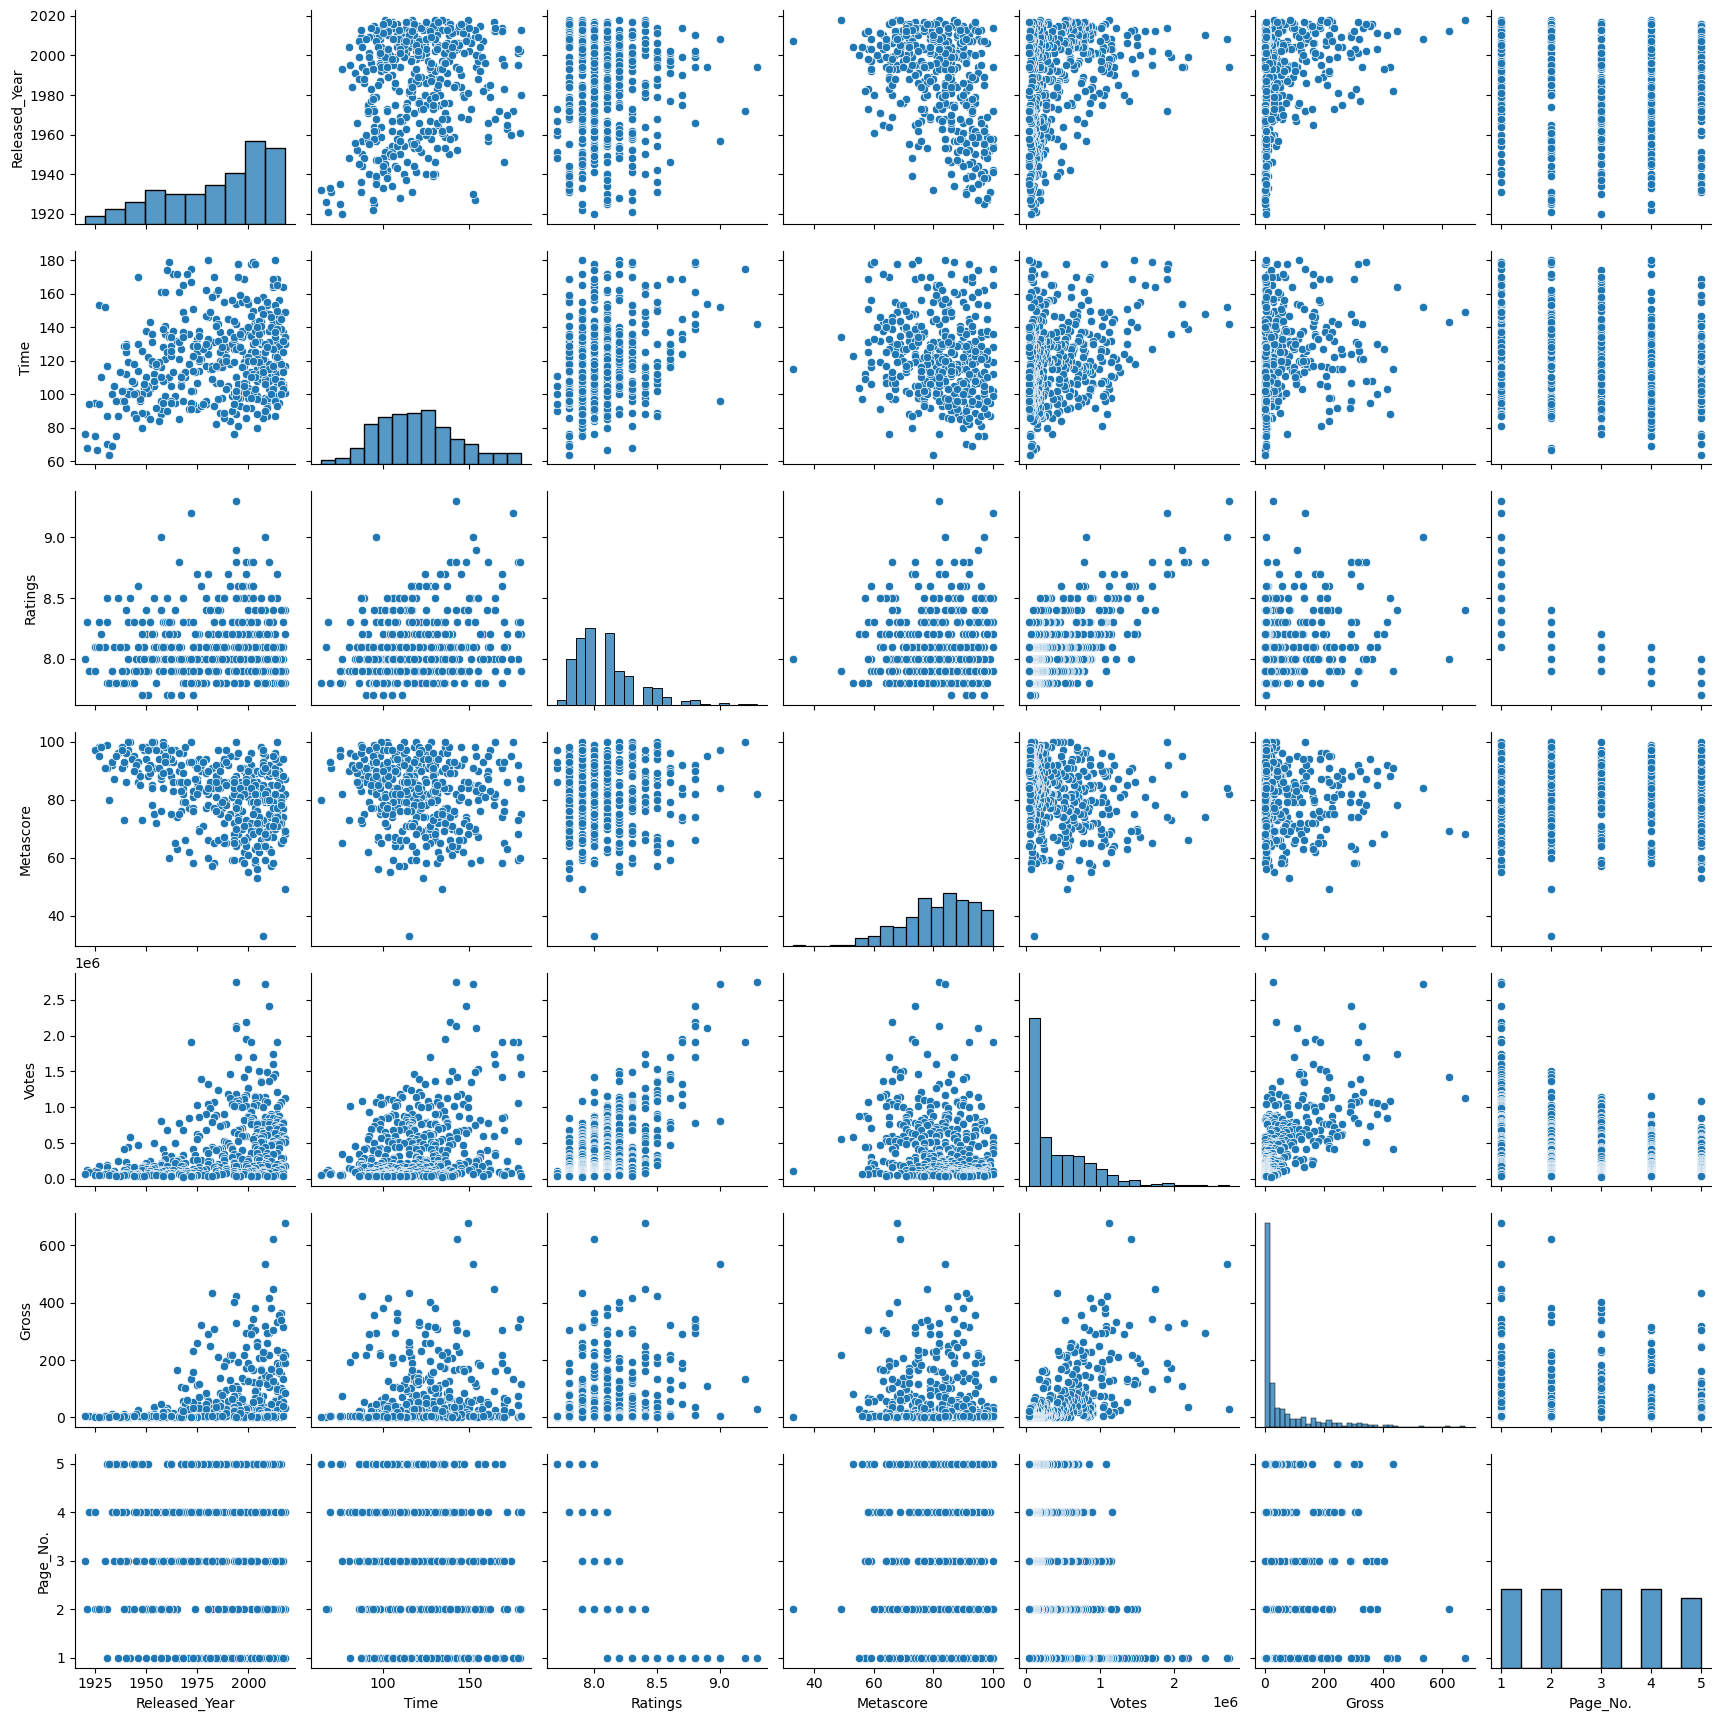

In [81]:
sns.pairplot(data=final_df)
plt.show()

<Axes: xlabel='Ratings', ylabel='Gross'>

Text(0.5, 1.0, 'scatter plot of Ratings vs Gross')

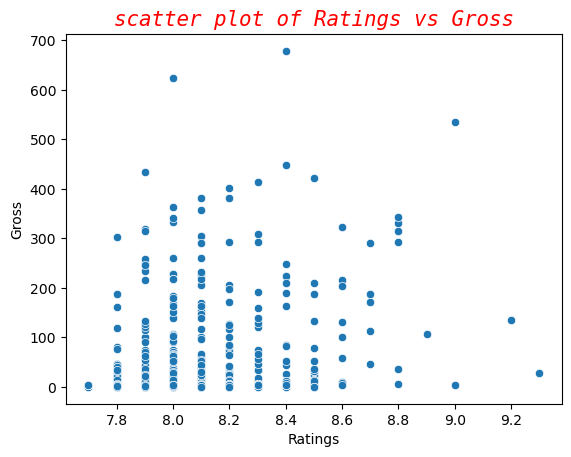

In [82]:
sns.scatterplot(x='Ratings',y='Gross',data=final_df)
plt.title('scatter plot of Ratings vs Gross',loc='center',\
          fontdict={'family':'monospace','style':'italic','color':'r','size':15})
plt.show()

<Axes: xlabel='Ratings', ylabel='Metascore'>

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
 [Text(0, 0, '7.7'),
  Text(1, 0, '7.8'),
  Text(2, 0, '7.9'),
  Text(3, 0, '8.0'),
  Text(4, 0, '8.1'),
  Text(5, 0, '8.2'),
  Text(6, 0, '8.3'),
  Text(7, 0, '8.4'),
  Text(8, 0, '8.5'),
  Text(9, 0, '8.6'),
  Text(10, 0, '8.7'),
  Text(11, 0, '8.8'),
  Text(12, 0, '8.9'),
  Text(13, 0, '9.0'),
  Text(14, 0, '9.2'),
  Text(15, 0, '9.3')])

Text(0.5, 1.0, 'Specialization vs Consulation fees')

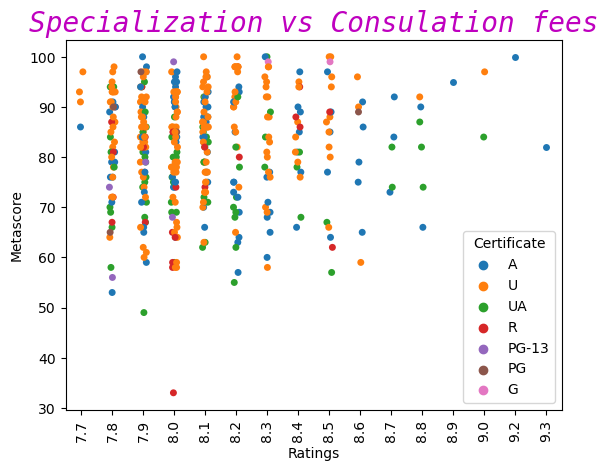

In [83]:
sns.stripplot(x='Ratings',y='Metascore',hue='Certificate',data=final_df)
plt.xticks(rotation=90)
plt.title('Specialization vs Consulation fees',loc='center',\
          fontdict={'family':'monospace','style':'italic','color':'m','size':20})
plt.show() 

<Axes: >

Text(0.5, 1.0, 'Heatmap')

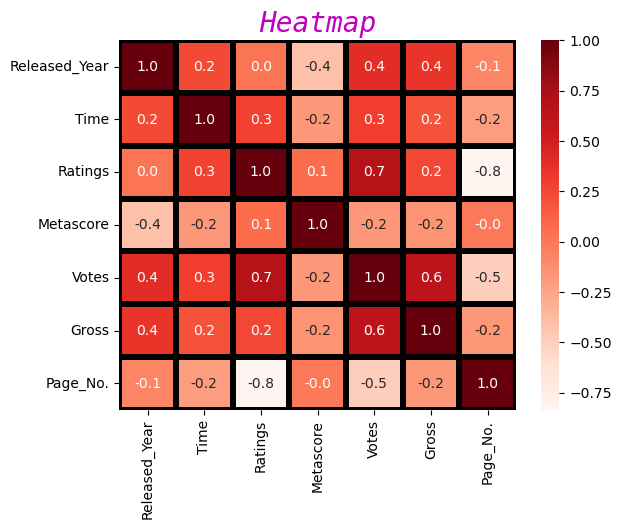

In [84]:
# Heatmap plot
sns.heatmap(final_df.corr(),annot=True,cmap="Reds",linecolor="black",linewidth=4,fmt='.1f')
plt.title('Heatmap',loc='center',\
          fontdict={'family':'monospace','style':'italic','color':'m','size':20})
plt.show()